In [25]:
from erddapClient import ERDDAP_Server
from pprint import pprint
import pandas as pd 
import numpy as np


remoteServer = ERDDAP_Server('https://coastwatch.pfeg.noaa.gov/erddap')
print(remoteServer)


<erddapClient.ERDDAP_Server>
Server version:  ERDDAP_version=2.11


In [26]:
searchResults = remoteServer.advancedSearch(searchFor="Gulf of Mexico -MODIS",
                                            minTime="2010-12-24T00:00:00Z",
                                            maxTime="2020-12-24T00:00:00Z")
searchResults

<erddapClient.ERDDAP_SearchResults>
Results:  5
[
  0 - <erddapClient.ERDDAP_Griddap> hycom_gom310D , "NRL HYCOM 1/25 deg model output, Gulf of Mexico, 10.04 Expt 31.0, 2009-2014, At Depths"
  1 - <erddapClient.ERDDAP_Griddap> hycom_gom310S , "NRL HYCOM 1/25 deg model output, Gulf of Mexico, 10.04 Expt 31.0, 2009-2014, At Surface"
  2 - <erddapClient.ERDDAP_Griddap> ucsdHfrE1 , "Currents, HF Radar, US East Coast and Gulf of Mexico, RTV, Near-Real Time, 2012-present, Hourly, 1km"
  3 - <erddapClient.ERDDAP_Griddap> ucsdHfrE2 , "Currents, HF Radar, US East Coast and Gulf of Mexico, RTV, Near-Real Time, 2012-present, Hourly, 2km"
  4 - <erddapClient.ERDDAP_Griddap> ucsdHfrE6 , "Currents, HF Radar, US East Coast and Gulf of Mexico, RTV, Near-Real Time, 2012-present, Hourly, 6km"
]

In [27]:
hycomgdap = searchResults[0]

print(hycomgdap)

<erddapClient.ERDDAP_Griddap>
Title:       NRL HYCOM 1/25 deg model output, Gulf of Mexico, 10.04 Expt 31.0, 2009-2014, At Depths
Server URL:  https://coastwatch.pfeg.noaa.gov/erddap
Dataset ID:  hycom_gom310D
Dimensions: 
  time (double) range=(cftime.DatetimeGregorian(2009, 4, 2, 0, 0, 0, 0), cftime.DatetimeGregorian(2014, 8, 30, 0, 0, 0, 0)) 
    Standard name: time 
    Units:         seconds since 1970-01-01T00:00:00Z 
  depth (float) range=(0.0, 5500.0) 
    Standard name: depth 
    Units:         m 
  latitude (float) range=(18.09165, 31.96065) 
    Standard name: latitude 
    Units:         degrees_north 
  longitude (float) range=(-98.0, -76.40002) 
    Standard name: longitude 
    Units:         degrees_east 
Variables: 
  temperature (float) 
    Standard name: sea_water_potential_temperature 
    Units:         degC 
  salinity (float) 
    Standard name: sea_water_practical_salinity 
    Units:         psu 
  u (float) 
    Standard name: eastward_sea_water_velocity 
  

In [28]:
pprint(hycomgdap.dimensions)
# This library parses the griddap dimension information, provided in the form
# sample: nValues=16, evenlySpaced=false, averageSpacing=91 days 6h 24m 0s 
# And include this values in _nValues, _evenlySpaced, _averageSpacing attributes

{'depth': {'_CoordinateAxisType': 'Height',
           '_CoordinateZisPositive': 'down',
           '_averageSpacing': 141.02564102564102,
           '_dataType': 'float',
           '_evenlySpaced': False,
           '_nValues': 40,
           'actual_range': (0.0, 5500.0),
           'axis': 'Z',
           'ioos_category': 'Location',
           'long_name': 'Depth',
           'positive': 'down',
           'standard_name': 'depth',
           'units': 'm'},
 'latitude': {'_CoordinateAxisType': 'Lat',
              '_averageSpacing': 0.0361171875,
              '_dataType': 'float',
              '_evenlySpaced': False,
              '_nValues': 385,
              'actual_range': (18.09165, 31.96065),
              'axis': 'Y',
              'ioos_category': 'Location',
              'long_name': 'Latitude',
              'standard_name': 'latitude',
              'units': 'degrees_north'},
 'longitude': {'_CoordinateAxisType': 'Lon',
               '_averageSpacing': 0.03999996296

In [29]:
pprint(hycomgdap.variables)
# This dictionary includes the variable metadata

{'salinity': {'_FillValue': 1.267651e+30,
              '_dataType': 'float',
              'colorBarMaximum': 37.0,
              'colorBarMinimum': 32.0,
              'ioos_category': 'Salinity',
              'long_name': 'Sea Water Practical Salinity',
              'standard_name': 'sea_water_practical_salinity',
              'units': 'psu',
              'valid_range': (0.33169016, 38.789318)},
 'temperature': {'_FillValue': 1.267651e+30,
                 '_dataType': 'float',
                 'colorBarMaximum': 32.0,
                 'colorBarMinimum': 0.0,
                 'ioos_category': 'Temperature',
                 'long_name': 'Sea Water Temperature',
                 'standard_name': 'sea_water_potential_temperature',
                 'units': 'degC',
                 'valid_range': (2.6549964, 28.802729)},
 'u': {'_FillValue': 1.267651e+30,
       '_dataType': 'float',
       'colorBarMaximum': 0.5,
       'colorBarMinimum': -0.5,
       'ioos_category': 'Currents',


https://coastwatch.pfeg.noaa.gov/erddap/griddap/hycom_gom310D.png?temperature[(2009-04-02)][(0.0)][][]&.draw=surface&.vars=longitude|latitude|temperature&.colorBar=|||15|29|


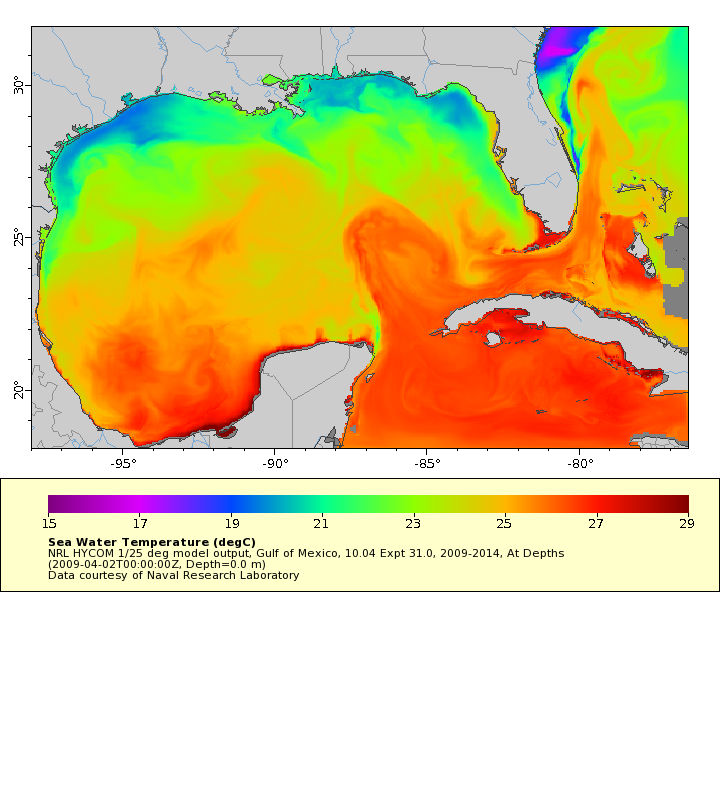

In [30]:
# Request a PNG Plot

from IPython.display import Image

hycomgdap.clearQuery()
surfacePlot = (
    hycomgdap.setResultVariables("temperature[(2009-04-02)][(0.0)][][]")
    .addConstraint(".draw=surface")
    .addConstraint(".vars=longitude|latitude|temperature")
    .addConstraint(".colorBar=|||15|29|")
)
# Reference for graphic commands in ERDDAP
# https://coastwatch.pfeg.noaa.gov/erddap/tabledap/documentation.html#GraphicsCommands

print(surfacePlot.getURL('png', useSafeURL=False))
Image(data=surfacePlot.getData('largePng'))

URL request: https://coastwatch.pfeg.noaa.gov/erddap/griddap/hycom_gom310D.csvp?temperature%5B0%3Alast%5D%5B%280.0%29%5D%5B%2822.5%29%5D%5B%28-95.5%29%5D%2Csalinity%5B0%3Alast%5D%5B%280.0%29%5D%5B%2822.5%29%5D%5B%28-95.5%29%5D


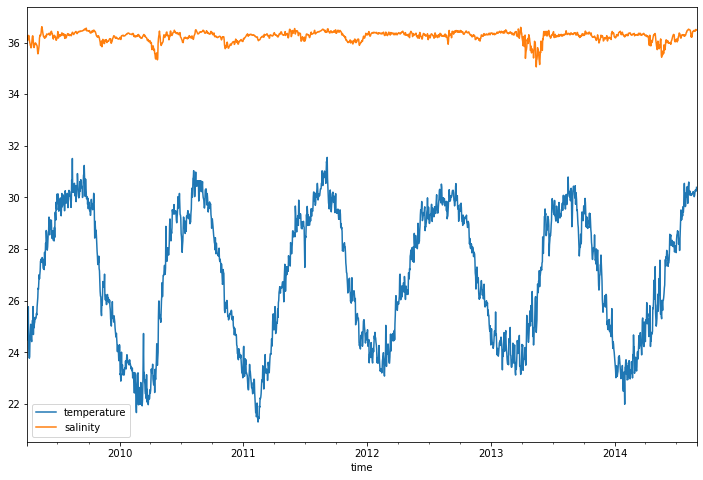

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Request a time series data from location

hycomgdap.clearQuery()
request = ( hycomgdap.setResultVariables(["temperature[0:last][(0.0)][(22.5)][(-95.5)]",
                                           "salinity[0:last][(0.0)][(22.5)][(-95.5)]"])
                      .getURL() )

print ("URL request: %s" % request)

tsdf = (
    hycomgdap.getDataFrame(header=0, 
                           names=["time", "depth", "latitude", "longitude", "temperature", "salinity"], 
                           parse_dates=["time"],
                           index_col="time")
)

tsdf.plot(y=['temperature','salinity'])


In [32]:
# Request the dataset as an xarray object
#
print(hycomgdap.xarray)

<xarray.Dataset>
Dimensions:      (depth: 40, latitude: 385, longitude: 541, time: 1977)
Coordinates:
  * time         (time) datetime64[ns] 2009-04-02 2009-04-03 ... 2014-08-30
  * depth        (depth) float32 0.0 5.0 10.0 15.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude     (latitude) float32 18.09 18.13 18.17 ... 31.89 31.93 31.96
  * longitude    (longitude) float32 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
Data variables:
    temperature  (time, depth, latitude, longitude) float32 ...
    salinity     (time, depth, latitude, longitude) float32 ...
    u            (time, depth, latitude, longitude) float32 ...
    v            (time, depth, latitude, longitude) float32 ...
    w_velocity   (time, depth, latitude, longitude) float32 ...
Attributes:
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.0, ACDD-1.3
    creator_email:              hycomdata@coaps.fsu.edu
    creator_name:               Naval Research Laboratory
    creator_type:               

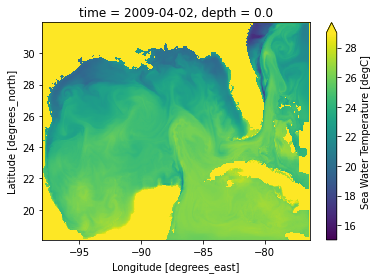

In [8]:
# Map plot out of a data slice with xarray

hycomgdap.xarray.temperature[0,0,:,:].plot(vmin=15,vmax=29)